# Preparacion De los Datos

## Extraccion del archivo tratado en le desafio anterior

In [1]:
import pandas as pd

datos = pd.read_csv('datos_limpiados.csv')

In [2]:
datos.head()

,customerID,Evasion,Genero,Ciudadano_Senior,Socio,Dependientes,Antiguedad,Servicio_Telefonico,Lineas_Multiples,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Contrato,Facturacion_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               7256 non-null   object 
 1   Evasion                  7256 non-null   int64  
 2   Genero                   7256 non-null   object 
 3   Ciudadano_Senior         7256 non-null   int64  
 4   Socio                    7256 non-null   int64  
 5   Dependientes             7256 non-null   int64  
 6   Antiguedad               7256 non-null   int64  
 7   Servicio_Telefonico      7256 non-null   int64  
 8   Lineas_Multiples         7256 non-null   object 
 9   Servicio_Internet        7256 non-null   object 
 10  Seguridad_Online         7256 non-null   object 
 11  Respaldo_Online          7256 non-null   object 
 12  Proteccion_Dispositivo   7256 non-null   object 
 13  Soporte_Tecnico          7256 non-null   object 
 14  TV_Streaming            

## Eliminación de Columnas Irrelevantes

In [4]:
datos.drop('customerID',axis=1, inplace=True)

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Evasion                  7256 non-null   int64  
 1   Genero                   7256 non-null   object 
 2   Ciudadano_Senior         7256 non-null   int64  
 3   Socio                    7256 non-null   int64  
 4   Dependientes             7256 non-null   int64  
 5   Antiguedad               7256 non-null   int64  
 6   Servicio_Telefonico      7256 non-null   int64  
 7   Lineas_Multiples         7256 non-null   object 
 8   Servicio_Internet        7256 non-null   object 
 9   Seguridad_Online         7256 non-null   object 
 10  Respaldo_Online          7256 non-null   object 
 11  Proteccion_Dispositivo   7256 non-null   object 
 12  Soporte_Tecnico          7256 non-null   object 
 13  TV_Streaming             7256 non-null   object 
 14  Peliculas_Streaming     

## Encoder

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer #auxilia a componer como realizar la transformacion

In [7]:
categoricas = [
    'Genero',
    'Lineas_Multiples',
    'Seguridad_Online',
    'Servicio_Internet',
    'Respaldo_Online',
    'Proteccion_Dispositivo',
    'Soporte_Tecnico',
    'TV_Streaming',
    'Peliculas_Streaming',
    'Contrato',
    'Metodo_Pago'
]

In [8]:
columnas = datos.columns

In [9]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                   categoricas),
                                 remainder = 'passthrough') #passthrough Basicamente que se las salte

In [10]:
datos_encoder = one_hot.fit_transform(datos)

In [11]:
one_hot.get_feature_names_out(columnas)
datos_encoder = pd.DataFrame(datos_encoder,columns=one_hot.get_feature_names_out(columnas))

In [12]:
datos_encoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 42 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   onehotencoder__Genero_Male                                 7256 non-null   float64
 1   onehotencoder__Lineas_Multiples_No                         7256 non-null   float64
 2   onehotencoder__Lineas_Multiples_No phone service           7256 non-null   float64
 3   onehotencoder__Lineas_Multiples_Yes                        7256 non-null   float64
 4   onehotencoder__Seguridad_Online_No                         7256 non-null   float64
 5   onehotencoder__Seguridad_Online_No internet service        7256 non-null   float64
 6   onehotencoder__Seguridad_Online_Yes                        7256 non-null   float64
 7   onehotencoder__Servicio_Internet_DSL                       7256 non-null   float64
 8   onehoten

In [13]:
for col in datos.columns:
    tipo = datos[col].dtype
    nombre_transformado = f'remainder__{col}'
    if nombre_transformado in datos_encoder.columns:
        datos_encoder[nombre_transformado] = datos_encoder[nombre_transformado].astype(tipo)


In [14]:
datos_encoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 42 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   onehotencoder__Genero_Male                                 7256 non-null   float64
 1   onehotencoder__Lineas_Multiples_No                         7256 non-null   float64
 2   onehotencoder__Lineas_Multiples_No phone service           7256 non-null   float64
 3   onehotencoder__Lineas_Multiples_Yes                        7256 non-null   float64
 4   onehotencoder__Seguridad_Online_No                         7256 non-null   float64
 5   onehotencoder__Seguridad_Online_No internet service        7256 non-null   float64
 6   onehotencoder__Seguridad_Online_Yes                        7256 non-null   float64
 7   onehotencoder__Servicio_Internet_DSL                       7256 non-null   float64
 8   onehoten

## Verificación de la Proporción de Cancelación (Churn)

In [15]:
datos_encoder['remainder__Evasion'].value_counts()

remainder__Evasion
0    5271
1    1985
Name: count, dtype: int64

## Definiendo X e Y

In [16]:
X = datos_encoder.drop('remainder__Evasion',axis=1)
y = datos_encoder['remainder__Evasion']

In [17]:
y.value_counts()

remainder__Evasion
0    5271
1    1985
Name: count, dtype: int64

## Obteniendo conjunto de entrenamiento y prueba

In [18]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.3,random_state=4)
X_train.shape

(5079, 41)

## Balanceo de Clases (opcional)

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
smote = SMOTE(random_state=4)

In [21]:
X_oversampling, y_oversampling = smote.fit_resample(X_train,y_train)

In [22]:
y_oversampling.value_counts()

remainder__Evasion
0    3695
1    3695
Name: count, dtype: int64

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [23]:
from imblearn.under_sampling import NearMiss

In [24]:
nearmiss = NearMiss(version = 3)

X_undersampling, y_undersampling = nearmiss.fit_resample(X_train,y_train)

In [25]:
y_undersampling.value_counts()

remainder__Evasion
0    1384
1    1384
Name: count, dtype: int64

### SMOTEENN

https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html

In [26]:
from imblearn.combine import SMOTEENN

In [27]:
smoteenn = SMOTEENN(random_state=4, smote=SMOTE())

In [28]:
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_train,y_train)

In [29]:
y_smoteenn.value_counts()

remainder__Evasion
1    2173
0    1823
Name: count, dtype: int64

## Normalización o Estandarización (si es necesario)

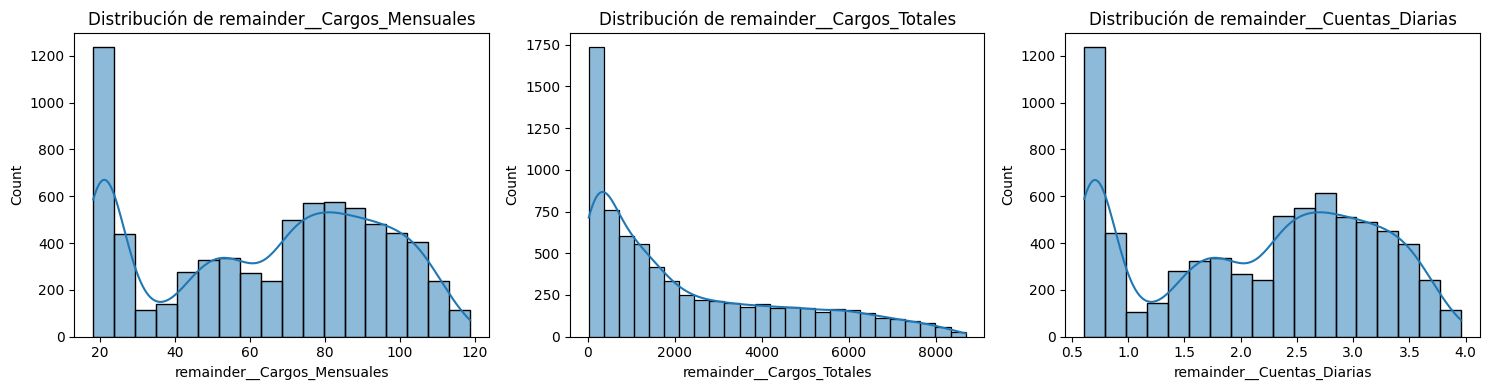

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

columnas_numericas = ['remainder__Cargos_Mensuales', 'remainder__Cargos_Totales', 'remainder__Cuentas_Diarias']

plt.figure(figsize=(15, 4))
for i, col in enumerate(columnas_numericas):
    plt.subplot(1, 3, i+1)
    sns.histplot(datos_encoder[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()


In [31]:
import plotly.express as px

for col in columnas_numericas:
    fig = px.box(datos_encoder, y=col, title=f'Boxplot de {col}')
    fig.show()

Como se observa en los histogramas, las variables numéricas presentan asimetría positiva, lo que podría afectar el rendimiento de modelos de regresión que asumen distribuciones normales. Sin embargo, dado que el objetivo es predecir si el cliente cancela o no y se utilizarán modelos como árboles de decisión, Random Forest o XGBoost, no es necesario normalizar los datos en este caso. 

# Correlación y Selección de Variables

## Análisis de Correlación


In [32]:
correlaciones = datos_encoder.corr()

In [33]:
correlacion_objetivo = correlaciones['remainder__Evasion'].drop('remainder__Evasion')

correlacion_ordenada = correlacion_objetivo.sort_values(ascending=False)

# Mostrar como tabla
pd.DataFrame({
    'Variable': correlacion_ordenada.index,
    'Correlación con Evasion': correlacion_ordenada.values
})


,Variable,Correlación con Evasion
0,onehotencoder__Contrato_Month-to-month,0.390015
1,onehotencoder__Seguridad_Online_No,0.328477
2,onehotencoder__Soporte_Tecnico_No,0.325477
3,onehotencoder__Servicio_Internet_Fiber optic,0.300222
4,onehotencoder__Metodo_Pago_Electronic check,0.294409
5,onehotencoder__Respaldo_Online_No,0.259056
6,onehotencoder__Proteccion_Dispositivo_No,0.241157
7,remainder__Cuentas_Diarias,0.189744
8,remainder__Cargos_Mensuales,0.189688
9,remainder__Facturacion_Electronica,0.187249


## Análisis Dirigido

### Contrato X Evasion

In [34]:
import plotly.express as px

# Agrupar por tipo de contrato y calcular la tasa promedio de cancelación
cancelacion_por_contrato = datos.groupby('Contrato')['Evasion'].mean().reset_index()

# Crear gráfico de barras
fig = px.bar(
    cancelacion_por_contrato,
    x='Contrato',
    y='Evasion',
    title='Tasa promedio de cancelación por tipo de contrato',
    labels={'Contrato': 'Tipo de contrato', 'Evasion': 'Tasa de cancelación'},
    color='Evasion',
    color_continuous_scale='Reds'
)
fig.show()


* Se puede apreciar cómo los contratos Mes a Mes tienden en un 43% a cancelar sus contratos con la empresa, en comparación con un 12% para los contratos anuales y solo un 4% para los contratos de 2 años. Por lo tanto, se deberá poner especial énfasis en los contratos Mes a Mes, ya que representan el segmento con mayor riesgo de cancelación.

### Gasto Total X Evasion

In [35]:
datos_encoder['rango_gasto'] = pd.cut(datos_encoder['remainder__Cargos_Totales'], bins=6)

# intervalos a texto
datos_encoder['rango_gasto'] = datos_encoder['rango_gasto'].astype(str)

# tasa promedio de evasión por rango
evasión_por_rango = datos_encoder.groupby('rango_gasto')['remainder__Evasion'].mean().reset_index()

In [36]:
fig = px.bar(
    evasión_por_rango,
    x='rango_gasto',
    y='remainder__Evasion',
    title='Tasa de evasión según rango de gasto total',
    labels={'rango_gasto': 'Rango de gasto total', 'remainder__Evasion': 'Tasa de evasión'},
    color='remainder__Evasion',
    color_continuous_scale='Reds'
)
fig.show()

* Como se puede apreciar, mientras mayor sea el Gasto total de los consumidores, menor sera su tasa de Cancelacion

# Modelado Predictivo

## Entrenamiento del modelo Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
modelo = RandomForestClassifier(max_depth = 5, random_state=4)

modelo.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=4)

In [39]:
y_pred = modelo.predict(X_test)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1576
           1       0.67      0.42      0.52       601

    accuracy                           0.78      2177
   macro avg       0.74      0.67      0.69      2177
weighted avg       0.77      0.78      0.77      2177



In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def matriz_de_confusion(y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

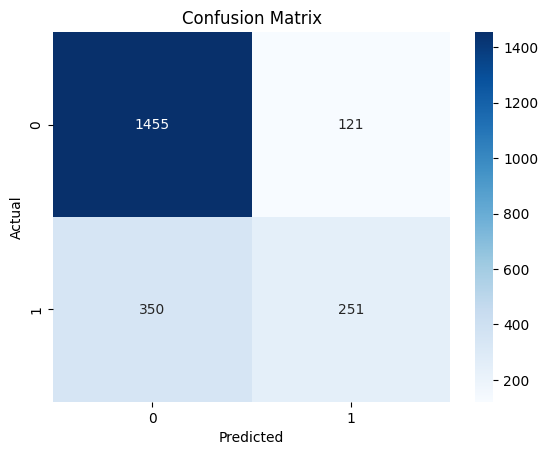

In [42]:
matriz_de_confusion(y_pred)

* Si bien el modelo cuenta con un 78% de accuracy, su valor f1-score para la prediccion de Canceladores es apenas de un 52%, por lo tanto aun requiere ajustes

### Analizaremos cuales son las features mas importantes, para reducir la dimencionaliad del conjunto de entrenamiento

In [43]:
importances = modelo.feature_importances_

In [44]:
features_importances = pd.DataFrame({'Features':X.columns, 'Importances':importances.round(2)}).sort_values('Importances', ascending=False)
features_importances

,Features,Importances
25,onehotencoder__Contrato_Month-to-month,0.20
35,remainder__Antiguedad,0.12
39,remainder__Cargos_Totales,0.08
4,onehotencoder__Seguridad_Online_No,0.08
8,onehotencoder__Servicio_Internet_Fiber optic,0.06
30,onehotencoder__Metodo_Pago_Electronic check,0.06
16,onehotencoder__Soporte_Tecnico_No,0.06
27,onehotencoder__Contrato_Two year,0.04
38,remainder__Cargos_Mensuales,0.04
40,remainder__Cuentas_Diarias,0.04


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [46]:
resultados = pd.DataFrame(index=['Accuracy','Precision','Recall','F1'])
ct_features = [i if i != 0 else 1 for i in range(0, X_train.shape[1]+1, 4)]

In [47]:
for k in ct_features:
    X_train_k = X_train.iloc[:, :k]
    X_test_k = X_test.iloc[:, :k]

    modelo_clf = RandomForestClassifier(max_depth=5, random_state=4)
    modelo_clf.fit(X_train_k, y_train)
    y_pred = modelo_clf.predict(X_test_k)

    resultados[f'{k}_features'] = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='weighted', zero_division=0),
        recall_score(y_test, y_pred, average='weighted', zero_division=0),
        f1_score(y_test, y_pred, average='weighted', zero_division=0)
    ]

print(resultados.T)

             Accuracy  Precision    Recall        F1
1_features   0.723932   0.524078  0.723932  0.608003
4_features   0.723932   0.524078  0.723932  0.608003
8_features   0.729904   0.688376  0.729904  0.664939
12_features  0.747359   0.728212  0.747359  0.731935
16_features  0.753330   0.729783  0.753330  0.722275
20_features  0.754249   0.731789  0.754249  0.729027
24_features  0.753330   0.729767  0.753330  0.721665
28_features  0.769867   0.755862  0.769867  0.758411
32_features  0.769407   0.751843  0.769407  0.747845
36_features  0.784566   0.771040  0.784566  0.765862
40_features  0.786863   0.773944  0.786863  0.768251


* De esto, podemos definir que con 28 features es mas que suficiente para entrenar el modelo, ya que practicamente no hay mucha diferencia su aumentamos a 36 u 38 por su valor de F1

In [48]:
selected_features = features_importances['Features'].values[:28] #se seleccionan todas hasta i
X_selected_features = X[selected_features]
X_selected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 28 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   onehotencoder__Contrato_Month-to-month                     7256 non-null   float64
 1   remainder__Antiguedad                                      7256 non-null   int64  
 2   remainder__Cargos_Totales                                  7256 non-null   float64
 3   onehotencoder__Seguridad_Online_No                         7256 non-null   float64
 4   onehotencoder__Servicio_Internet_Fiber optic               7256 non-null   float64
 5   onehotencoder__Metodo_Pago_Electronic check                7256 non-null   float64
 6   onehotencoder__Soporte_Tecnico_No                          7256 non-null   float64
 7   onehotencoder__Contrato_Two year                           7256 non-null   float64
 8   remainde

In [49]:
X_train, X_test, y_train, y_test = tts(X_selected_features,y, test_size=0.3, random_state=4)

### Optimizando con GridSearch

* Utilizaremos paramGrid para obtener los hiperparametros optimos, ademas de realizar la validacion cruzada mediante KFold

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = {
        'max_depth':[5,10,15],
        'min_samples_leaf':[1,2,3],
        'min_samples_split':[2,4,6],
        'n_estimators':[100,150,200]
    }

In [51]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [52]:
cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=4)
model_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='f1_weighted', 
             refit=True, cv=cv) #f1_weighted Ya que estamos entrenando con datos ddesbalanceados

In [53]:
model_grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='f1_weighted')

In [54]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1576
           1       0.67      0.49      0.57       601

    accuracy                           0.79      2177
   macro avg       0.75      0.70      0.72      2177
weighted avg       0.78      0.79      0.78      2177



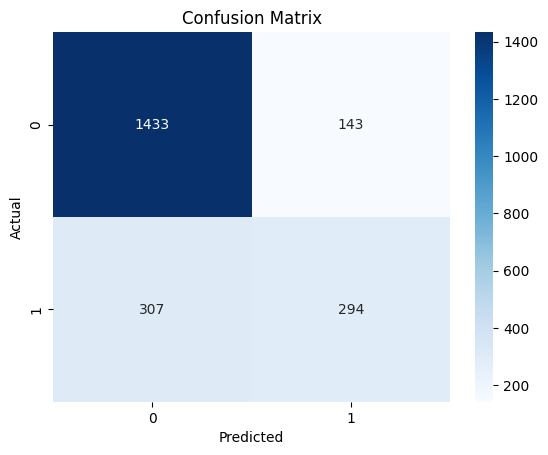

In [55]:
y_pred_grid = model_grid.predict(X_test)

print(classification_report(y_test, y_pred_grid))

matriz_de_confusion(y_pred_grid)

* Se puede apreciar una peque;a mejora, apenas de un 4% en predecir bien a aquellos que pueden Cancelar su contrato. Por lo tanto aun queda por mejorar, pero para ello ocuparemos datos ya valanceados, tanto por UnderSampling, Oversampling y SMOTEENN

### Modelo RandomForest con Oversampling

In [56]:
modelo_oversampling = RandomForestClassifier(max_depth =10,min_samples_leaf = 2,
                                             min_samples_split =6,n_estimators=100,
                                             random_state=4)

* Recordar que tenemos que ajustar a 28 features

In [57]:
selected_features = features_importances['Features'].values[:28] #se seleccionan todas hasta i
X_selected_features_over = X_oversampling[selected_features]
X_selected_features_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7390 entries, 0 to 7389
Data columns (total 28 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   onehotencoder__Contrato_Month-to-month                     7390 non-null   float64
 1   remainder__Antiguedad                                      7390 non-null   int64  
 2   remainder__Cargos_Totales                                  7390 non-null   float64
 3   onehotencoder__Seguridad_Online_No                         7390 non-null   float64
 4   onehotencoder__Servicio_Internet_Fiber optic               7390 non-null   float64
 5   onehotencoder__Metodo_Pago_Electronic check                7390 non-null   float64
 6   onehotencoder__Soporte_Tecnico_No                          7390 non-null   float64
 7   onehotencoder__Contrato_Two year                           7390 non-null   float64
 8   remainde

In [58]:
modelo_oversampling.fit(X_selected_features_over, y_oversampling)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=6,
                       random_state=4)

### Modelo RandomForest con Undersampling

In [59]:
modelo_undersampling = RandomForestClassifier(max_depth =10,min_samples_leaf = 2,
                                             min_samples_split =6,n_estimators=100,
                                             random_state=4)

In [60]:
selected_features = features_importances['Features'].values[:28] #se seleccionan todas hasta i
X_selected_features_under = X_undersampling[selected_features]
X_selected_features_under.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 28 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   onehotencoder__Contrato_Month-to-month                     2768 non-null   float64
 1   remainder__Antiguedad                                      2768 non-null   int64  
 2   remainder__Cargos_Totales                                  2768 non-null   float64
 3   onehotencoder__Seguridad_Online_No                         2768 non-null   float64
 4   onehotencoder__Servicio_Internet_Fiber optic               2768 non-null   float64
 5   onehotencoder__Metodo_Pago_Electronic check                2768 non-null   float64
 6   onehotencoder__Soporte_Tecnico_No                          2768 non-null   float64
 7   onehotencoder__Contrato_Two year                           2768 non-null   float64
 8   remainde

In [61]:
modelo_undersampling.fit(X_selected_features_under,y_undersampling)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=6,
                       random_state=4)

### Modelo RandomForest con SMOTEENN

In [62]:
modelo_smoteenn = RandomForestClassifier(max_depth =10,min_samples_leaf = 2,
                                             min_samples_split =6,n_estimators=100,
                                             random_state=4)

In [63]:
selected_features = features_importances['Features'].values[:28] #se seleccionan todas hasta i
X_selected_features_smoteenn = X_smoteenn[selected_features]
X_selected_features_smoteenn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 28 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   onehotencoder__Contrato_Month-to-month                     3996 non-null   float64
 1   remainder__Antiguedad                                      3996 non-null   int64  
 2   remainder__Cargos_Totales                                  3996 non-null   float64
 3   onehotencoder__Seguridad_Online_No                         3996 non-null   float64
 4   onehotencoder__Servicio_Internet_Fiber optic               3996 non-null   float64
 5   onehotencoder__Metodo_Pago_Electronic check                3996 non-null   float64
 6   onehotencoder__Soporte_Tecnico_No                          3996 non-null   float64
 7   onehotencoder__Contrato_Two year                           3996 non-null   float64
 8   remainde

In [64]:
modelo_smoteenn.fit(X_selected_features_smoteenn, y_smoteenn)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=6,
                       random_state=4)

### Obteniendo matriz de confucion de los 3 modelos

### Oversampling

In [65]:
print(classification_report(y_test, modelo_oversampling.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1576
           1       0.60      0.63      0.62       601

    accuracy                           0.78      2177
   macro avg       0.73      0.74      0.73      2177
weighted avg       0.79      0.78      0.78      2177



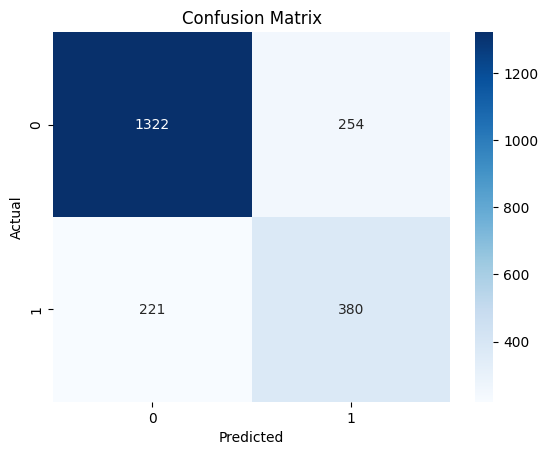

In [66]:
matriz_de_confusion(modelo_oversampling.predict(X_test))

### Undersampling

In [67]:
print(classification_report(y_test, modelo_undersampling.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.77      0.81      1576
           1       0.53      0.69      0.60       601

    accuracy                           0.74      2177
   macro avg       0.70      0.73      0.71      2177
weighted avg       0.77      0.74      0.75      2177



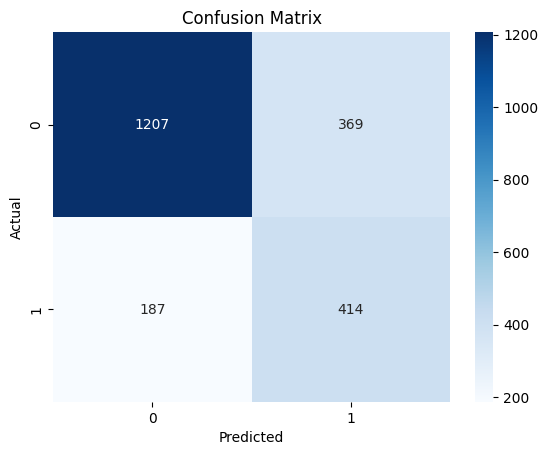

In [68]:
matriz_de_confusion(modelo_undersampling.predict(X_test))

### SMOTEENN

In [69]:
print(classification_report(y_test, modelo_smoteenn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1576
           1       0.55      0.73      0.63       601

    accuracy                           0.76      2177
   macro avg       0.72      0.75      0.72      2177
weighted avg       0.79      0.76      0.77      2177



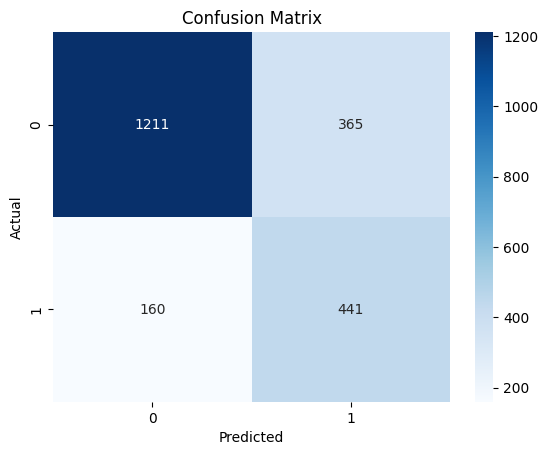

In [70]:
matriz_de_confusion(modelo_smoteenn.predict(X_test))

**El modelo con SMOTEENN ha demostrado ser el más eficaz para predecir qué clientes podrían cancelar su contrato.**

**¿Por qué?**

1. Mayor recall (0.73): Detecta la mayor proporción de canceladores reales, lo que es clave si tu negocio busca prevenir cancelaciones.

2. Menor cantidad de falsos negativos (160): Es el modelo que deja escapar menos canceladores, lo que maximiza oportunidades de retención.

3. F1-score más alto en clase positiva (0.63): Indica un mejor equilibrio entre precisión y cobertura.

4. Aunque tiene más falsos positivos que Oversampling, el costo de intervenir a un cliente que no iba a cancelar suele ser menor que el costo de perder uno que sí lo haría.

## Modelo con XGBoost

In [71]:
from xgboost import XGBClassifier

In [72]:
modelo_xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=4
)

In [84]:
param_grid = {
    'n_estimators': [100, 200, 250],
    'max_depth': [3, 4, 5,6],
    'learning_rate': [0.001, 0.01, 0.1],
    'subsample': [0.8, 1.0],
    'scale_pos_weight': [1, 3]  #Por desbalance
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

In [85]:
grid_search = GridSearchCV(
    estimator=modelo_xgb,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=cv,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor F1-score:", grid_search.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}
Mejor F1-score: 0.783120365757813


In [86]:
modelo_xgb_best = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=4,
    learning_rate = 0.1,
    max_depth =3,
    n_estimators = 100,
    scale_pos_weight = 1,
    subsample = 0.8
)

### XGBOOST con Oversampling

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1576
           1       0.62      0.60      0.61       601

    accuracy                           0.79      2177
   macro avg       0.73      0.73      0.73      2177
weighted avg       0.79      0.79      0.79      2177



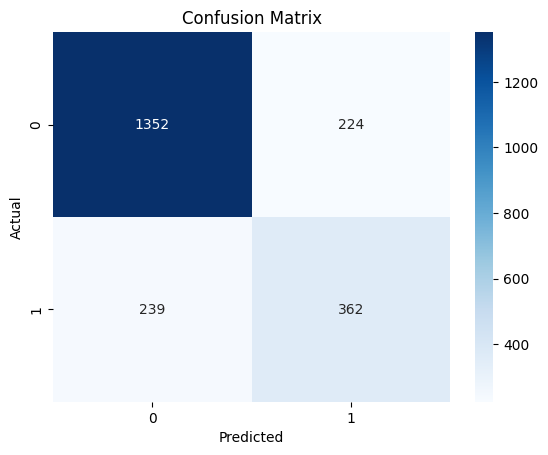

In [87]:
modelo_xgb_over = modelo_xgb_best.fit(X_selected_features_over, y_oversampling)
y_pred = modelo_xgb_over.predict(X_test)
print(classification_report(y_test, y_pred))
matriz_de_confusion(y_pred)

### XGBOOST con Undersampling

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1576
           1       0.54      0.69      0.61       601

    accuracy                           0.75      2177
   macro avg       0.70      0.73      0.71      2177
weighted avg       0.78      0.75      0.76      2177



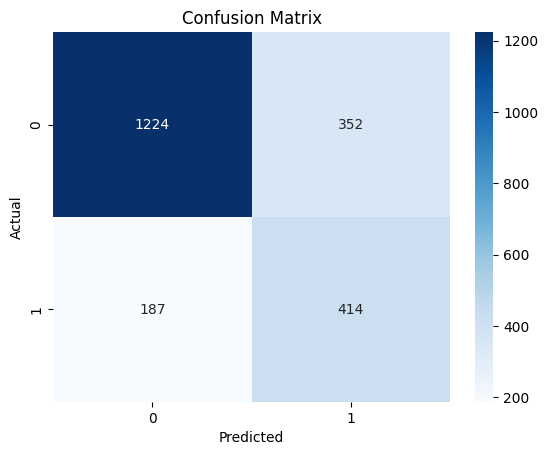

In [88]:
modelo_xgb_under = modelo_xgb_best.fit(X_selected_features_under, y_undersampling)
y_pred = modelo_xgb_under.predict(X_test)
print(classification_report(y_test, y_pred))
matriz_de_confusion(y_pred)

### XGBOOST con SMOTEENN

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1576
           1       0.56      0.73      0.63       601

    accuracy                           0.76      2177
   macro avg       0.72      0.75      0.73      2177
weighted avg       0.79      0.76      0.77      2177



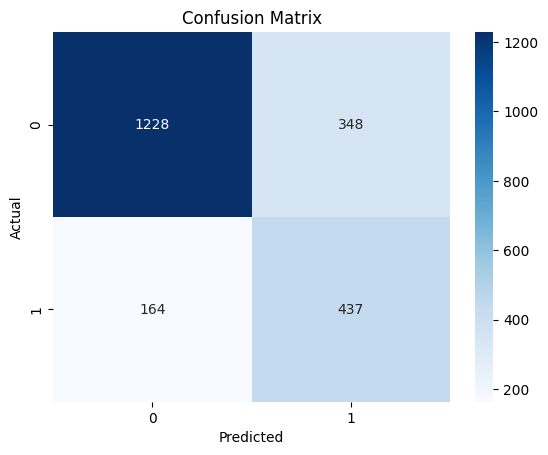

In [89]:
modelo_xgb_smoteenn = modelo_xgb_best.fit(X_selected_features_smoteenn, y_smoteenn)
y_pred = modelo_xgb_smoteenn.predict(X_test)
print(classification_report(y_test, y_pred))
matriz_de_confusion(y_pred)

* Nuevamente el modelo con SMOTEENN fue el que obtuvo mejor rendimiento

**¿Por qué?**

1. Máximo recall en canceladores (0.73): Está captando la mayor cantidad de clientes que efectivamente cancelan, algo crítico para acciones de retención.

2. Menor cantidad de Falsos Negativos (164): Es el modelo que deja escapar menos canceladores, lo que se traduce en menos oportunidades perdidas.

3. F1-score más alto en clase positiva (0.63): No solo detecta más, sino que lo hace de manera más equilibrada entre precisión y cobertura.

# Mejores Resultados de Cada Modelo de RandomForest y XGBoost

## RandomForest
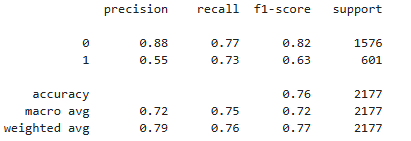

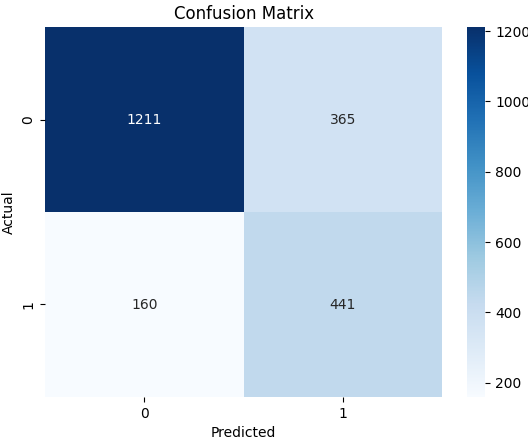


## XGBoost
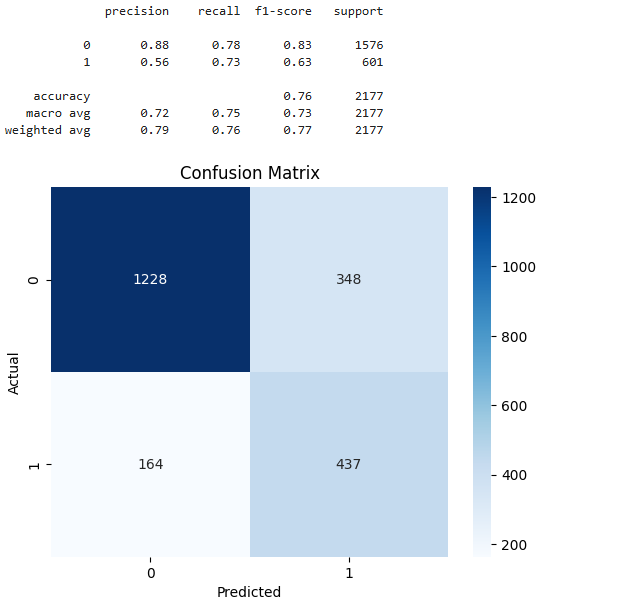

## Importancia de Variables – Modelo Random Forest

- `onehotencoder_Contrato_Month-to-month` (0.20): el tipo de contrato mensual es el principal indicador de cancelación.
- `remainder_Antiguedad` (0.12): la antigüedad del cliente influye significativamente en la decisión, principalmente porque clientes con mayor antiguedad confian mas en  la empresa, mientras que los nuevos aun  no estan seguros.
- `remainder_Cargos_Totales` (0.08): el monto total de cargos tiene un impacto relevante ya que los usuarios podrian encontrar caro el servicio.
- `onehotencoder__Seguridad_Online_No` (0.08): Igual de relevante que los cargos totales, puede ser que los clientes que no contratan seguridad no confien mucho en la empresa.

Estas variables ayudan a la reducción de impureza en los árboles. Posteriormente, se seleccionaron **28 features** para el entrenamiento.


## Importancia Variables - Modelo XGBoost

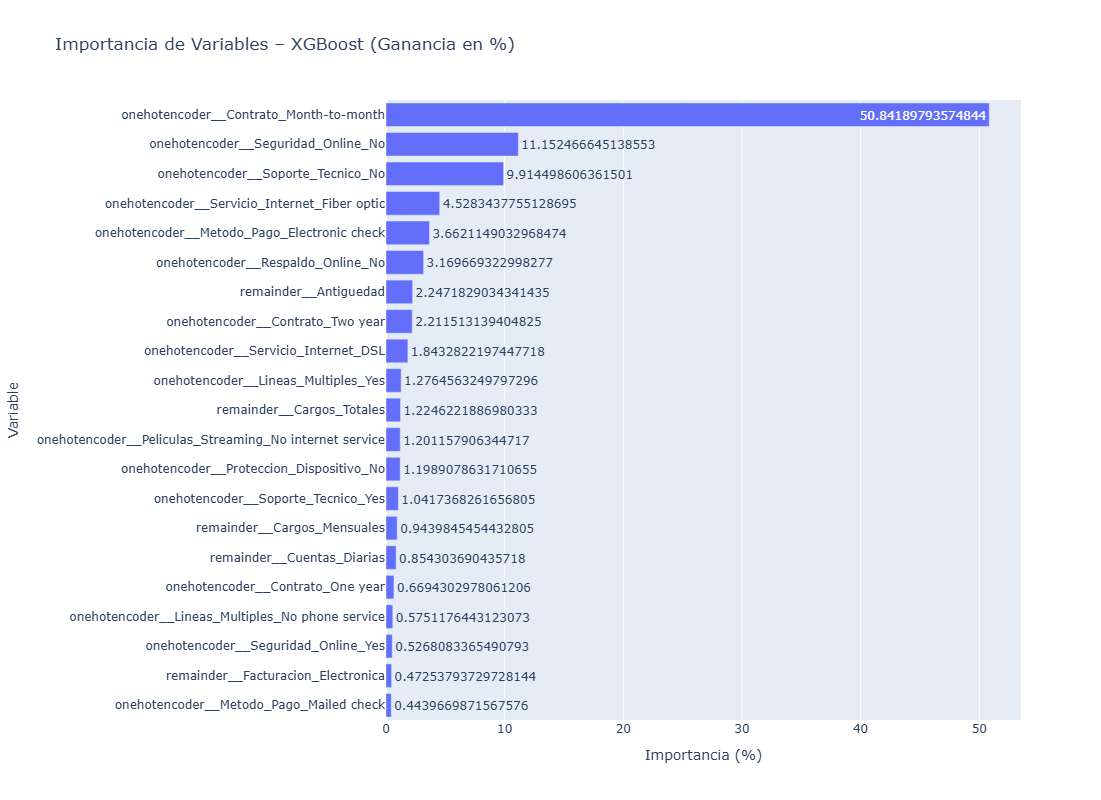

In [97]:
import plotly.express as px

gain_importance = modelo_xgb_smoteenn.get_booster().get_score(importance_type='gain')

total_gain = sum(gain_importance.values())
importance_pct = {k: 100 * v / total_gain for k, v in gain_importance.items()}
importance_sorted = dict(sorted(importance_pct.items(), key=lambda item: item[1], reverse=True))

importancia_df = pd.DataFrame({
    'Variable': list(importance_sorted.keys()),
    'Importancia (%)': list(importance_sorted.values())
})

fig = px.bar(
    importancia_df,
    x='Importancia (%)',
    y='Variable',
    orientation='h',
    title='Importancia de Variables – XGBoost (Ganancia en %)',
    text='Importancia (%)'
)
fig.update_layout(
    yaxis=dict(autorange='reversed'),
    height=800
)
fig.show()


Se puede apreciar como las features de contrato Mes a Mes y seguridad online son las que mas influyen en este modelo al igual que en RandomForest, mientras que la antiguedad y cargos totales bajan significativamente su importancia. Ahora se enumeraran las 3 mas relevantes

1. **Contrato_Month-to-month** (50.8%): Son aquellos donde se encuentra la mayor cantidad de clientes que cancelaron sus contratos, ademas de que una gran cantidad de clientes cuenta con este mismo.
2. **Seguridad_Online_No** (11.2%): Aparece como un factor importante en la desicion de los usuarios de cancelar sus contratos.
3. **Servicio_Tecnico_No** (9.9%): Existe la posibilidad de que algunos usuarios tuvieron problemas tenicos con su servicio, y al no contar con servicio tecnico decidieron dar de baja su contrato.

# Guardando Modelo Champion

In [100]:
import pickle
with open("modelo_champion_clientes_cancelacion.pkl", "wb") as f:
    pickle.dump(modelo_xgb_smoteenn, f)

with open("onehot_encoder.pkl", "wb") as f:
    pickle.dump(one_hot, f)